Q1.Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [11]:
#import excel file
file = pd.read_excel('ENB2012_data.xlsx')
file.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [12]:
#handling missing values
file.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

no missing values

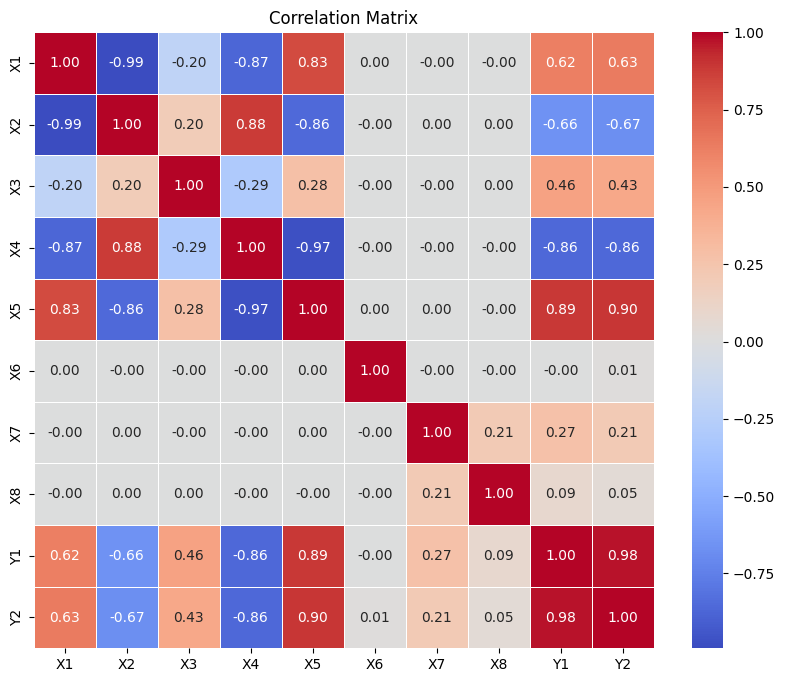

In [16]:
corr_matrix = file.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [17]:
# X2 and X4  shows negative value for y1,so dropping
file = file.drop(['X2' , 'X4'] , axis = 1 )

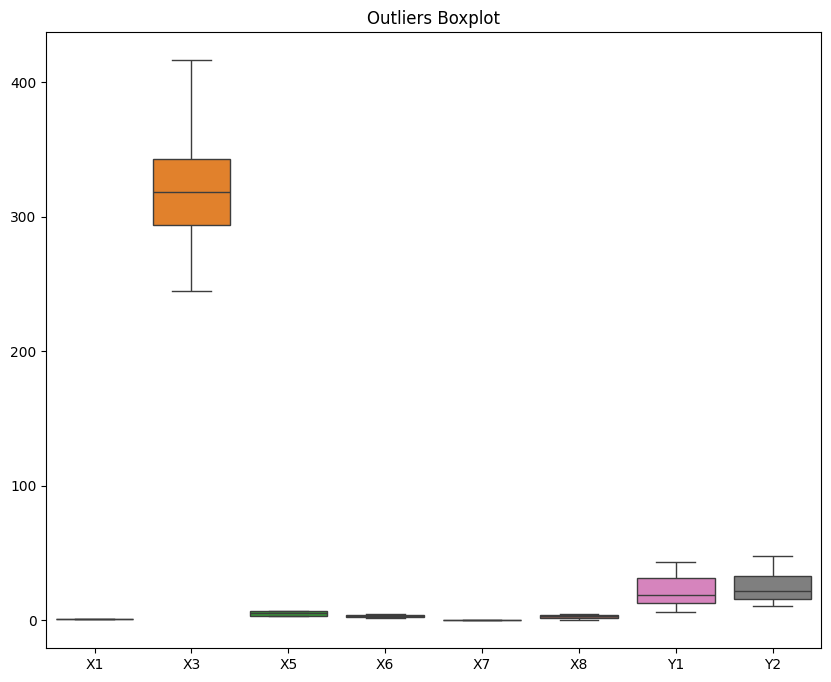

In [19]:
# Identify potential outliers 
plt.figure(figsize=(10, 8))
sns.boxplot(data=file)
plt.title("Outliers Boxplot")
plt.show()


ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [22]:
# Define features (X) and target (y)
X = file.drop(columns=['Y1', 'Y2'])  # Drop target variables to get only features
y = file["Y1"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [23]:
#manual linear regression using normal equation theta = (XTX)-1XTy
def linear_regression(X_train ,  y_train):
    # Add intercept column to X_train
    X_train_b =  np.c_[np.ones(X_train.shape[0]), X_train]
     # find coefficients 
    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    return theta

# Training the model 
theta_manual = linear_regression(X_train_scaled, y_train)
print(theta_manual)

[22.15503257 -1.39118171  1.59288178  9.65507366 -0.02454408  2.7149263
  0.33619866]


In [24]:
# Linear regression using sklearn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)

22.1550325732899
[-1.39118171  1.59288178  9.65507366 -0.02454408  2.7149263   0.33619866]


In [25]:
# Lasso Regression using sklearn
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

22.1550325732899
[-0.          2.16130156  8.24667298 -0.          2.63576533  0.24724018]


In [26]:
# Ridge Regression using sklearn
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

22.1550325732899
[-1.24477499  1.66281749  9.4992238  -0.02604625  2.71116121  0.33597745]



(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [31]:
# Predictions for each model on the test set
y_p_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled].dot(theta_manual)
y_p_sklearn = lr.predict(X_test_scaled)
y_p_ridge = ridge_reg.predict(X_test_scaled)
y_p_lasso = lasso_reg.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    rmse = np.sqrt(mse)
    return r2, mse, rmse
    

In [32]:
# Evaluate manual model (from scratch)
r2_manual, mse_manual, rmse_manual = calculate_metrics(y_test, y_p_manual)
# Evaluate sklearn models
r2_sklearn, mse_sklearn, rmse_sklearn  = calculate_metrics(y_test, y_p_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate_metrics(y_test, y_p_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate_metrics(y_test, y_p_lasso)

# Print results
print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

Manual Linear Regression: R²=0.9086, MSE=9.5263, RMSE=3.0865 
Sklearn Linear Regression: R²=0.9086, MSE=9.5263, RMSE=3.0865
Ridge Regression: R²=0.9084, MSE=9.5517, RMSE=3.0906 
Lasso Regression: R²=0.9046, MSE=9.9392, RMSE=3.1526 


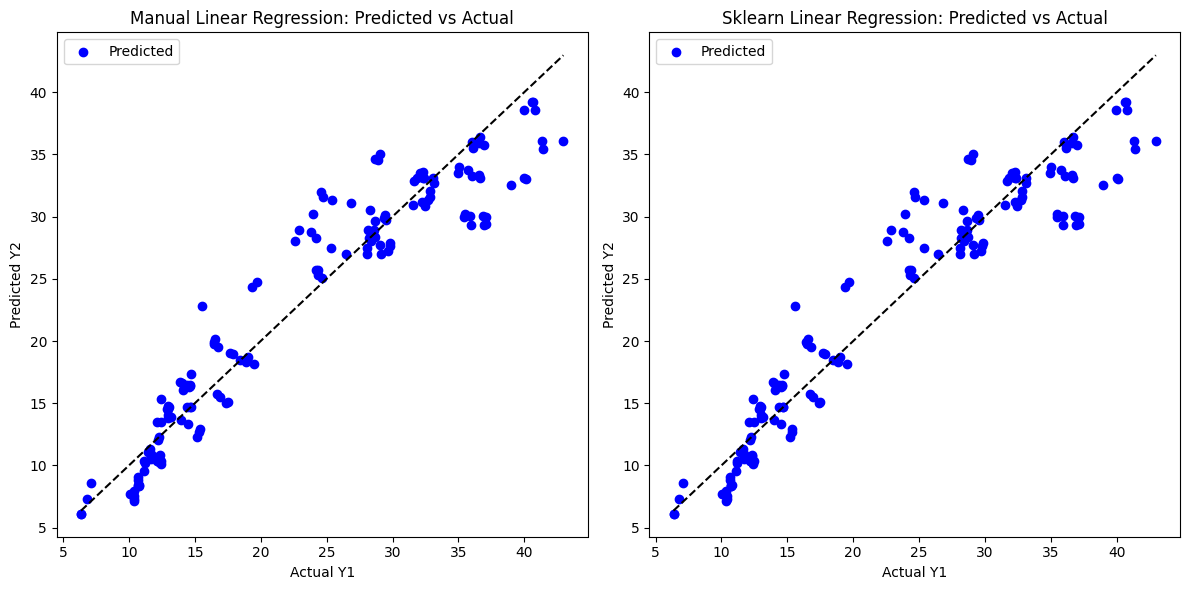

In [33]:
# Plot Predicted vs Actual for manual and sklearn models
plt.figure(figsize=(12, 6))

# Plot for Manual Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_p_manual, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Manual Linear Regression: Predicted vs Actual")
plt.legend()

# Plot for Sklearn Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_p_sklearn, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Sklearn Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

Model Insights: Feature Importance
The coefficients from linear models highlight which features most influence heating load. Larger coefficients indicate greater impact on the target variable.

Ridge and Lasso Regularization:
These models penalize large coefficients, helping to prevent overfitting. Features that retain significant coefficients after regularization are the most influential on heating load.

Recommendations:
Glazing Area: Reducing glazing area can lower heat loss and reduce heating load.
Roof Area & Insulation: Proper insulation or reducing roof area can improve energy efficiency.
Orientation: Optimizing orientation to the sun can reduce heating needs while balancing cooling requirements.